# Inspect TIGRESS-NCR Sightlines
Trey Wenger - October 2024

Visualize the TIGRESS-NCR sightlines and physical properties.

TODO: Explore residual stacking for WNM

## Load synthetic data

In [3]:
import pickle

resultsdir = "/media/drive1/tigress_ncr_results/R8_4pc"

synth_data_resampled = {"matched": {}, "mismatched": {}}

fwhms = [1, 3, 10]
for key in synth_data_resampled.keys():
    for fwhm in fwhms:
        print(key, fwhm)
        with open(f"{resultsdir}/HI_{key}_spectra_{fwhm}pix_resampled.pkl", "rb") as f:
            synth_data_resampled[key][fwhm] = pickle.load(f)

matched 1
matched 3
matched 10
mismatched 1
mismatched 3
mismatched 10


## Load TIGRESS-NCR sightline data

In [4]:
with open(f"{resultsdir}/tigress_tigress_results.pkl", "rb") as f:
    tigress_results = pickle.load(f)

## Compare $T_B$-weighted and $\tau$-weighted column densities

$N_{\rm HI, Em}$ is the total column density determined by integrating the density distribution and then smoothing the column density image to the given emission beam. This is an estimate of the average column density within the emission beam. But what is the physical interpretation?

analysis_plots version 0.1
analysis_plots version 0.1


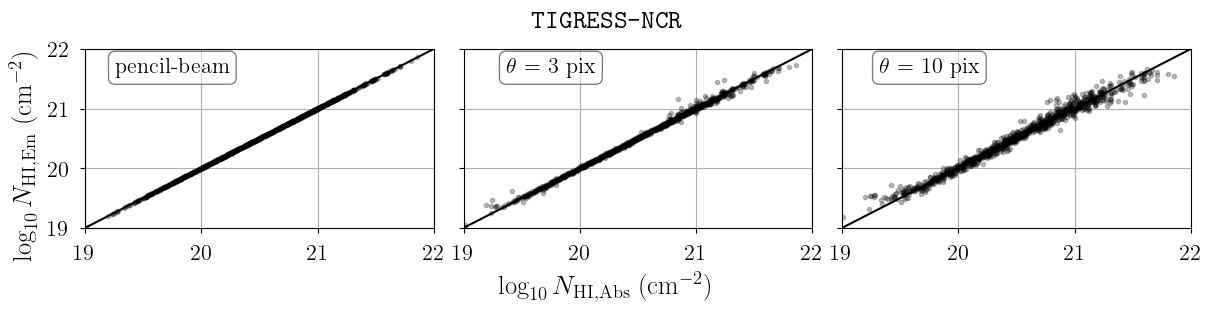

In [5]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["All_log10_NHI_tau", "All_log10_NHI_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\log_{10} N_{\rm HI, Abs}$ (cm$^{-2}$)",
    ylabel=r"$\log_{10} N_{\rm HI, Em}$ (cm$^{-2}$)",
    xlim=(19.0, 22.0),
    ylim=(19.0, 22.0),
    equal_line=True,
    label_loc="upper left",
)

analysis_plots version 0.1


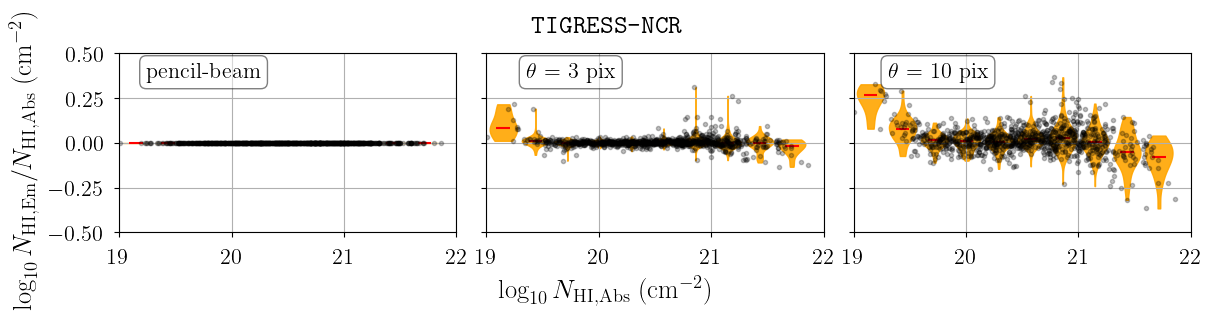

In [6]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["All_log10_NHI_tau", "All_log10_NHI_TB"],
    num_bins=10,
    relative="absolute",
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\log_{10} N_{\rm HI, Abs}$ (cm$^{-2}$)",
    ylabel=r"$\log_{10} N_{\rm HI, Em} / N_{\rm HI, Abs}$ (cm$^{-2}$)",
    xlim=(19.0, 22.0),
    ylim=(-0.5, 0.5),
    equal_line=False,
    label_loc="upper left",
)

In absorption, we probe a pencil-beam sightline. The quantity $N_{\rm HI, Em}$ is beam-averaged whereas $N_{\rm HI, Abs}$ is a pencil-beam measurement. At increasing emission beam sizes, the scatter in this relationship increases. The scatter tells you something about the variance in $N_{\rm HI}$ on these different scales. On a cloud-by-cloud basis, the ratio tells you the filling factor. These spectra are extracted perpendicular to the box rather than angle-opening sightlines -- the shape of the distribution will depend on the relative distances of the clouds.

## CNM Fraction

analysis_plots version 0.1


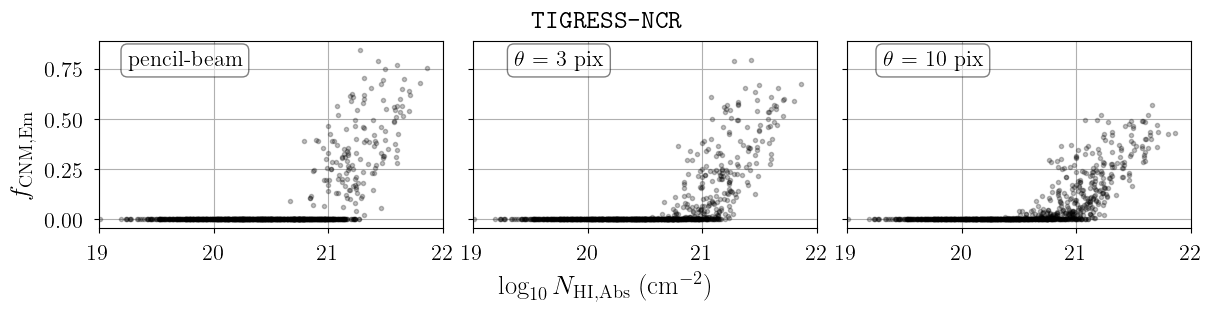

In [7]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["All_log10_NHI_tau", "CNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\log_{10} N_{\rm HI, Abs}$ (cm$^{-2}$)",
    ylabel=r"$f_{\rm CNM, Em}$",
    xlim=(19.0, 22.0),
    #ylim=(18.0, 22.0),
    equal_line=False,
    label_loc="upper left",
)

The threshold for CNM seems to be $\sim 10^{21} {\rm cm}^{-2}$.

analysis_plots version 0.1


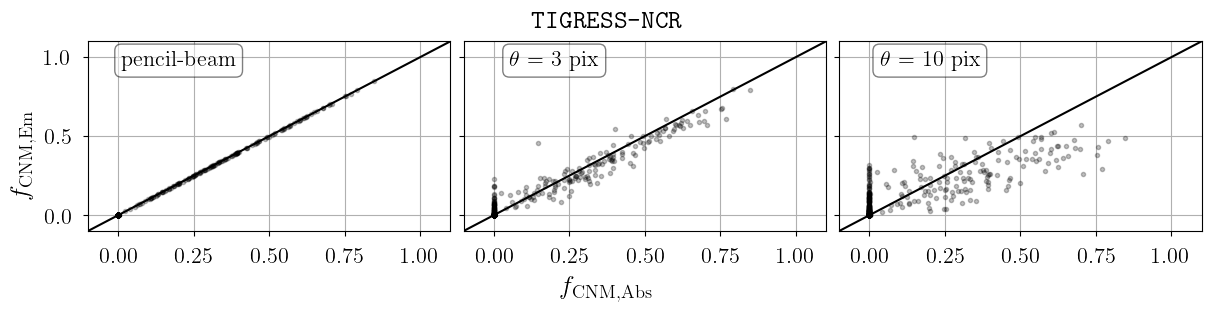

In [9]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["CNM_fraction_tau", "CNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$f_{\rm CNM, Abs}$",
    ylabel=r"$f_{\rm CNM, Em}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
)

With larger emission beams, we begin to see CNM that is not probed in emission ($f_{\rm CNM, Em} > f_{\rm CNM, Abs}$ for small $f_{\rm CNM, Abs}$ and we wash-out CNM for large $f_{\rm CNM, Abs}$.

These are both valid measures of the phase fractions. Without any constraints on the filling factor (fraction of T_B covered by each cloud) or absorption weight (clouds that may or may not appear in absorption), there is a systematic uncertainty -- you don't have any constraint on *which* of these measures you're measuring. Including these as parameters in the model allows you to compute each measure individually, and the medians to converge to reality (central limit theorem) without the systematic bias. Gaussian decomposition converges to... who knows?

analysis_plots version 0.1


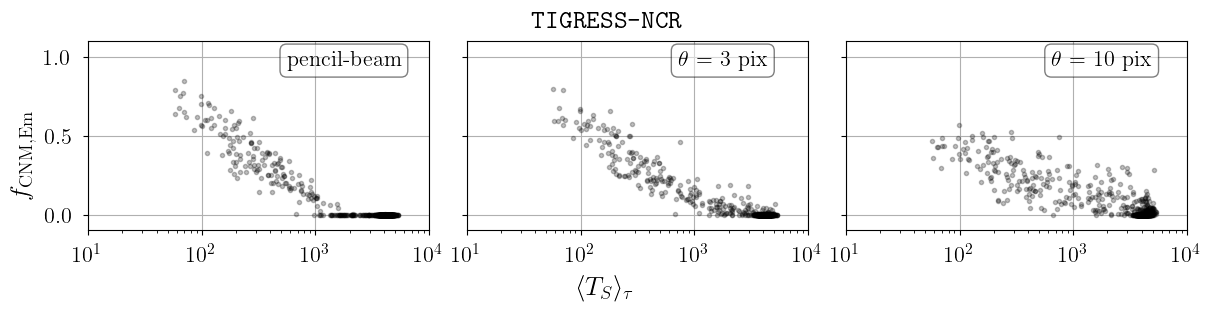

In [10]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["tau_weighted_tspin", "CNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\langle T_S\rangle_{\tau}$",
    ylabel=r"$f_{\rm CNM, Em}$",
    xlim=(10.0, 10000.0),
    ylim=(-0.1, 1.1),
    xscale="log",
    equal_line=False,
    label_loc="upper right",
)

## LNM Fraction

analysis_plots version 0.1


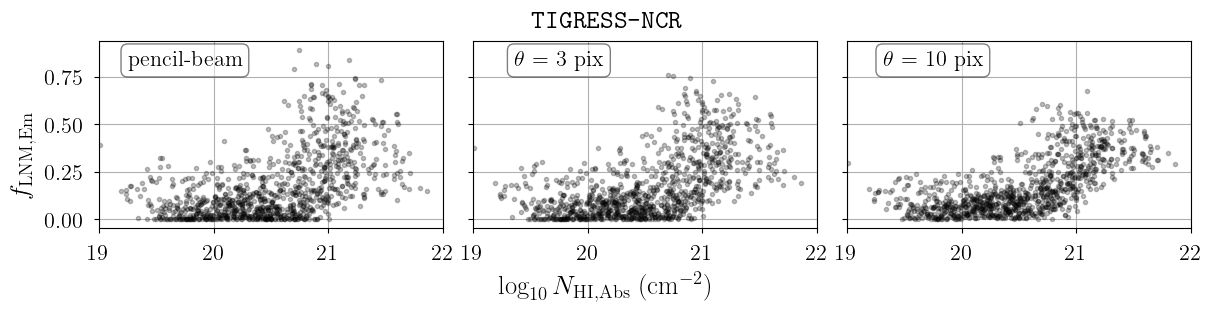

In [11]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["All_log10_NHI_tau", "LNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\log_{10} N_{\rm HI, Abs}$ (cm$^{-2}$)",
    ylabel=r"$f_{\rm LNM, Em}$",
    xlim=(19.0, 22.0),
    #ylim=(18.0, 22.0),
    equal_line=False,
    label_loc="upper left",
)

analysis_plots version 0.1


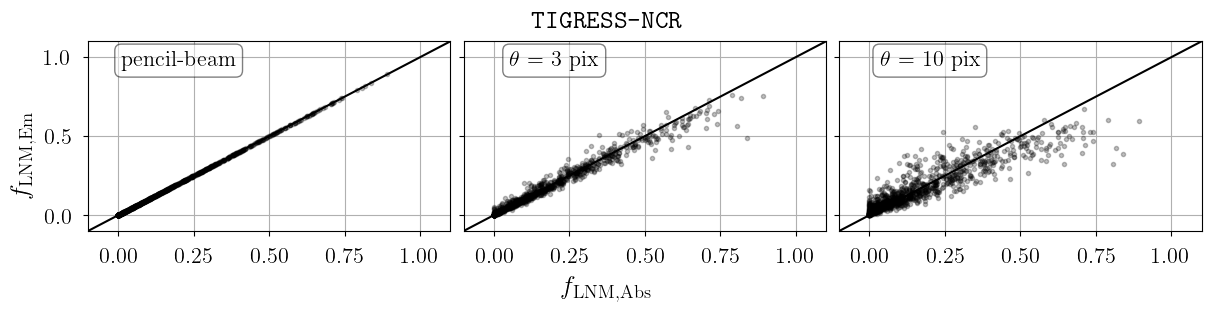

In [13]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["LNM_fraction_tau", "LNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$f_{\rm LNM, Abs}$",
    ylabel=r"$f_{\rm LNM, Em}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
)

The bias is not as extreme for the LNM, presumably because the filling factor of the LNM is larger.

analysis_plots version 0.1


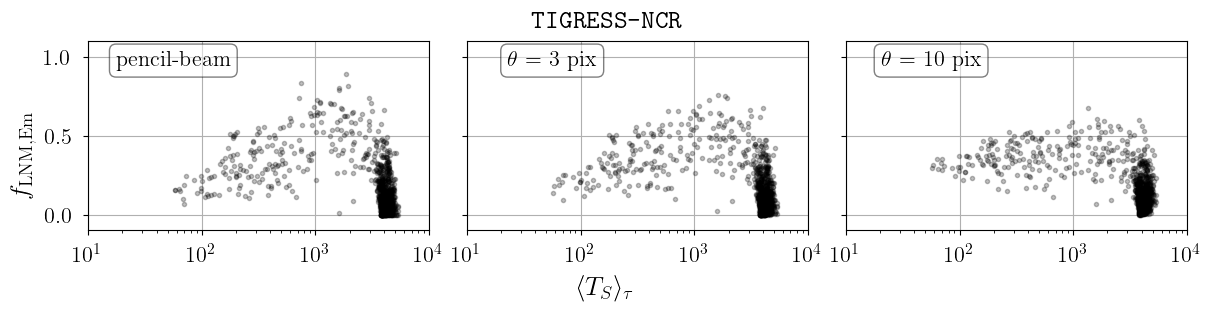

In [14]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["tau_weighted_tspin", "LNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\langle T_S\rangle_{\tau}$",
    ylabel=r"$f_{\rm LNM, Em}$",
    xlim=(10.0, 10000.0),
    ylim=(-0.1, 1.1),
    xscale="log",
    equal_line=False,
    label_loc="upper left",
)

## WNM Fraction

analysis_plots version 0.1


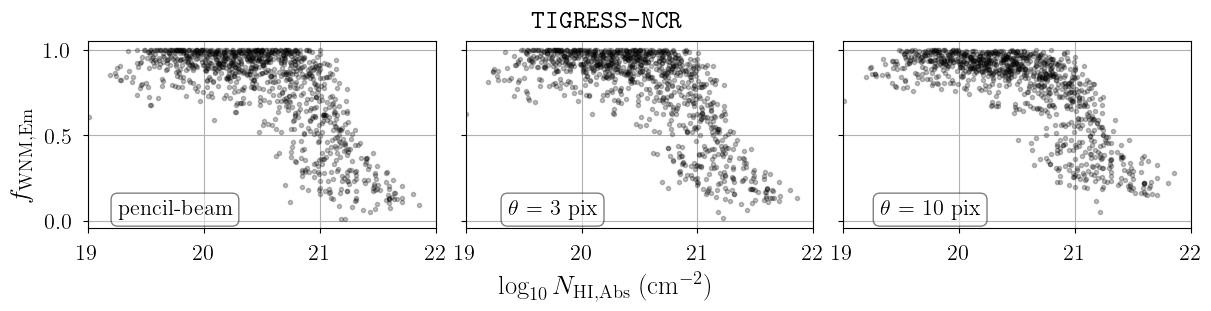

In [15]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["All_log10_NHI_tau", "WNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\log_{10} N_{\rm HI, Abs}$ (cm$^{-2}$)",
    ylabel=r"$f_{\rm WNM, Em}$",
    xlim=(19.0, 22.0),
    #ylim=(18.0, 22.0),
    equal_line=False,
    label_loc="lower left",
)

analysis_plots version 0.1


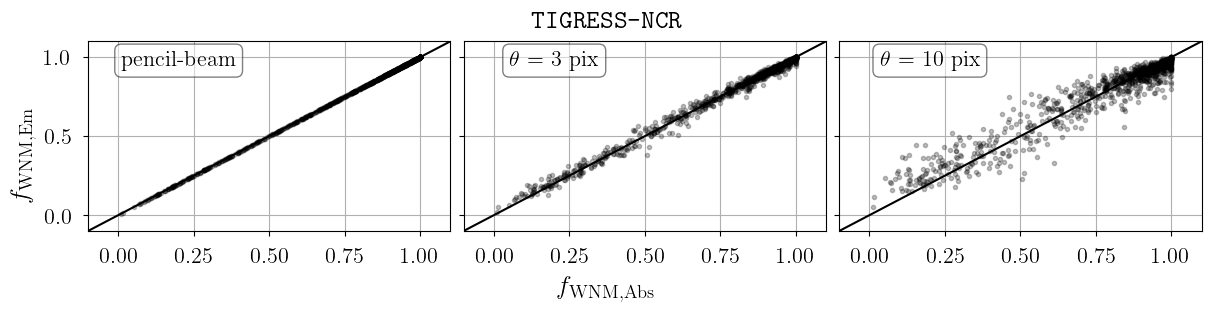

In [17]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["WNM_fraction_tau", "WNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$f_{\rm WNM, Abs}$",
    ylabel=r"$f_{\rm WNM, Em}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
)

analysis_plots version 0.1


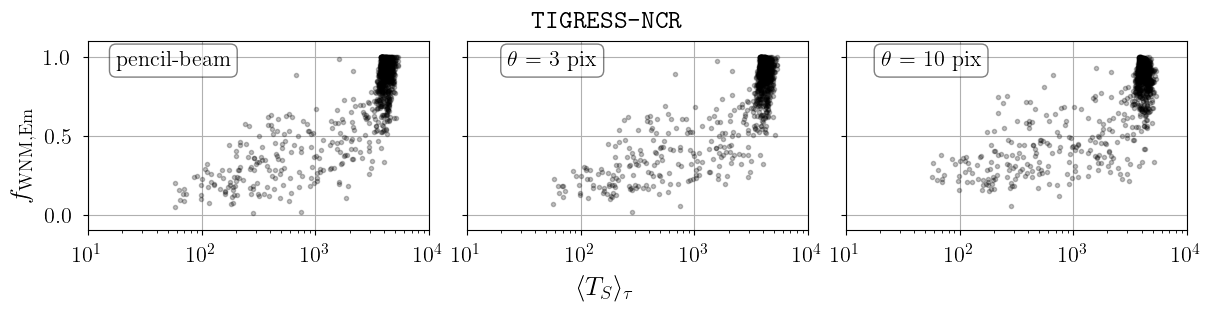

In [18]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["tau_weighted_tspin", "WNM_fraction_TB"],
    num_bins=0,
    title=r"\texttt{TIGRESS-NCR}",
    xlabel=r"$\langle T_S\rangle_{\tau}$",
    ylabel=r"$f_{\rm WNM, Em}$",
    xlim=(10.0, 10000.0),
    ylim=(-0.1, 1.1),
    xscale="log",
    equal_line=False,
    label_loc="upper left",
)

## Volume Density

analysis_plots version 0.1


/home/twenger/science/tigress_hi/scripts/analysis_plots.py:496: RuntimeWarning: divide by zero encountered in log10
  cdf_y = np.log10(np.nancumsum(ydata))


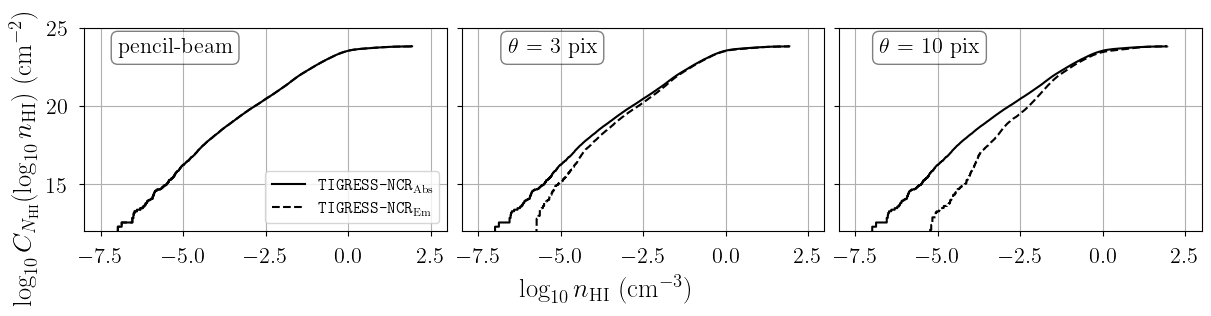

In [19]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_nHI_tau", "log10_nHI_TB"],
    labels=[r"\texttt{TIGRESS-NCR}$_{\rm Abs}$", r"\texttt{TIGRESS-NCR}$_{\rm Em}$"],
    xlabel=r"$\log_{10} n_{\rm HI}$ (cm$^{-3}$)",
    ylabel=r"$\log_{10} C_{N_{\rm HI}}(\log_{10} n_{\rm HI})$ (cm$^{-2}$)",
    xlim=(-8.0, 3.0),
    ylim=(12.0, 25.0),
    equal_line=False,
    volume=False,
    label_loc="upper left",
    legend_loc="lower right",
)

analysis_plots version 0.1


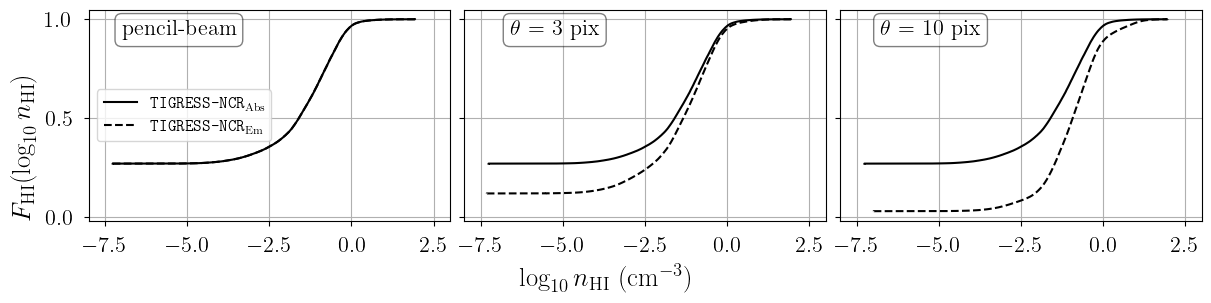

In [20]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_nHI_tau", "log10_nHI_TB"],
    labels=[r"\texttt{TIGRESS-NCR}$_{\rm Abs}$", r"\texttt{TIGRESS-NCR}$_{\rm Em}$"],
    xlabel=r"$\log_{10} n_{\rm HI}$ (cm$^{-3}$)",
    ylabel=r"$F_{\rm HI}(\log_{10} n_{\rm HI})$",
    xlim=(-8.0, 3.0),
    #ylim=(-0.1, 1.1),
    equal_line=False,
    volume=True,
    #yscale="log",
    label_loc="upper left",
    legend_loc="center left",
)

analysis_plots version 0.1


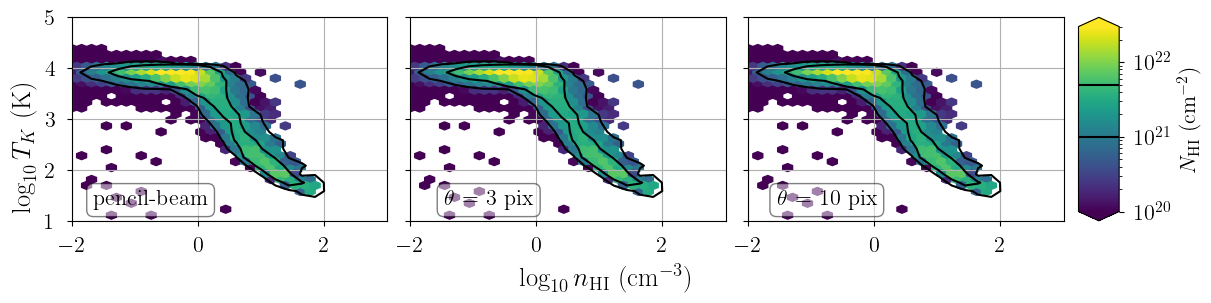

In [39]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative2D,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_nHI_tau", "log10_tkin_tau"],
    #labels=[r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{\tau}$", r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{T_B}$"],
    xlabel=r"$\log_{10} n_{\rm HI}$ (cm$^{-3}$)",
    ylabel=r"$\log_{10} T_K$ (K)",
    xlim=(-2.0, 3.0),
    ylim=(1.0, 5.0),
    equal_line=False,
    volume=False,
    label_loc="lower left",
    cbar_label=r"$N_{\rm HI}$ (cm$^{-2}$)",
    vmin=1.0e20,
    vmax=3.0e22,
    gridsize=25,
    contour_tigress=True,
    contour_levels=[1e21, 5e21],
)

analysis_plots version 0.1


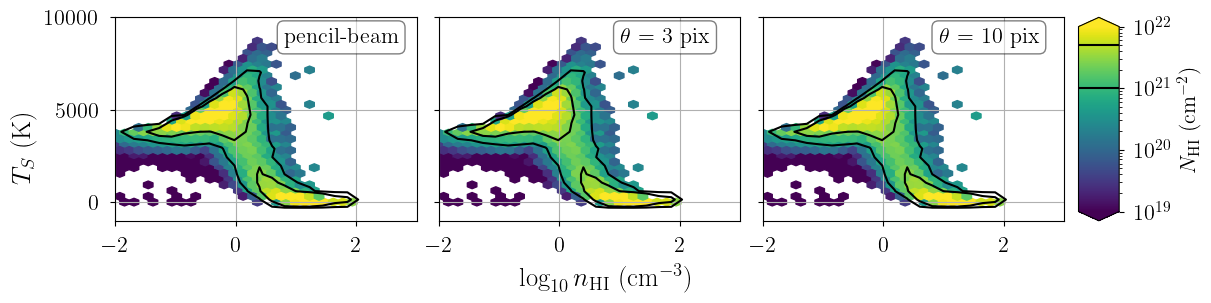

In [38]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative2D,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_nHI_tau", "tspin_tau"],
    #labels=[r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{\tau}$", r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{T_B}$"],
    xlabel=r"$\log_{10} n_{\rm HI}$ (cm$^{-3}$)",
    ylabel=r"$T_S$ (K)",
    xlim=(-2.0, 3.0),
    ylim=(-1000.0, 10000.0),
    equal_line=False,
    volume=False,
    label_loc="upper right",
    cbar_label=r"$N_{\rm HI}$ (cm$^{-2}$)",
    vmin=1.0e19,
    vmax=1.0e22,
    gridsize=25,
    contour_tigress=True,
    contour_levels=[1e21, 5e21],
)

analysis_plots version 0.1


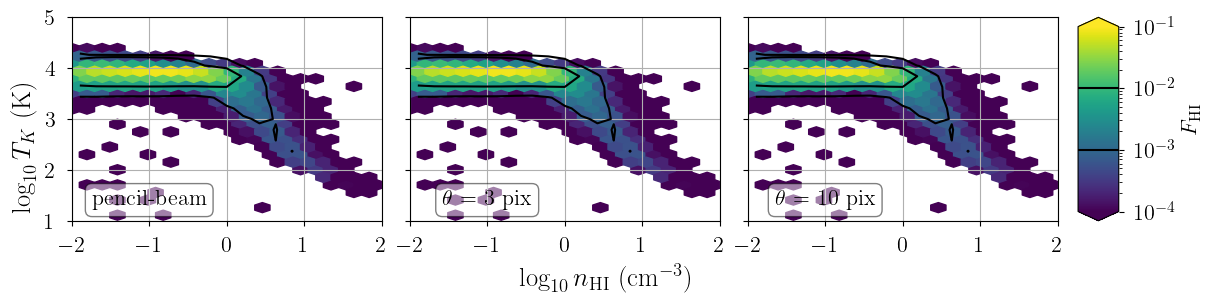

In [41]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative2D,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_nHI_tau", "log10_tkin_tau"],
    #labels=[r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{\tau}$", r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{T_B}$"],
    xlabel=r"$\log_{10} n_{\rm HI}$ (cm$^{-3}$)",
    ylabel=r"$\log_{10} T_K$ (K)",
    xlim=(-2.0, 2.0),
    ylim=(1.0, 5.0),
    equal_line=False,
    volume=True,
    label_loc="lower left",
    cbar_label=r"$F_{\rm HI}$",
    vmin=1.0e-4,
    vmax=0.1,
    contour_tigress=True,
    contour_levels=[1.0e-3, 1.0e-2],
)

analysis_plots version 0.1


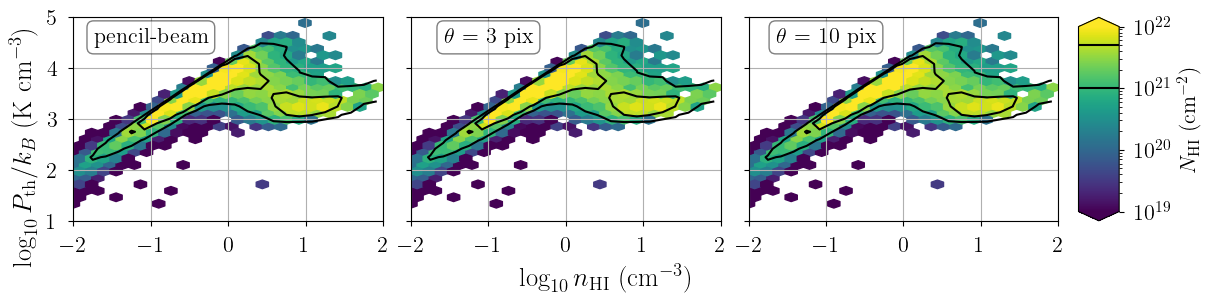

In [37]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative2D,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_nHI_tau", "log10_pressure_tau"],
    xlabel=r"$\log_{10} n_{\rm HI}$ (cm$^{-3}$)",
    ylabel=r"$\log_{10} P_{\rm th}/k_B$ (K cm$^{-3}$)",
    xlim=(-2.0, 2.0),
    ylim=(1.0, 5.0),
    equal_line=False,
    volume=False,
    label_loc="upper left",
    cbar_label=r"$N_{\rm HI}$ (cm$^{-2}$)",
    vmin=1.0e19,
    vmax=1.0e22,
    gridsize=25,
    contour_tigress=True,
    contour_levels=[1e21, 5e21],
)

analysis_plots version 0.1


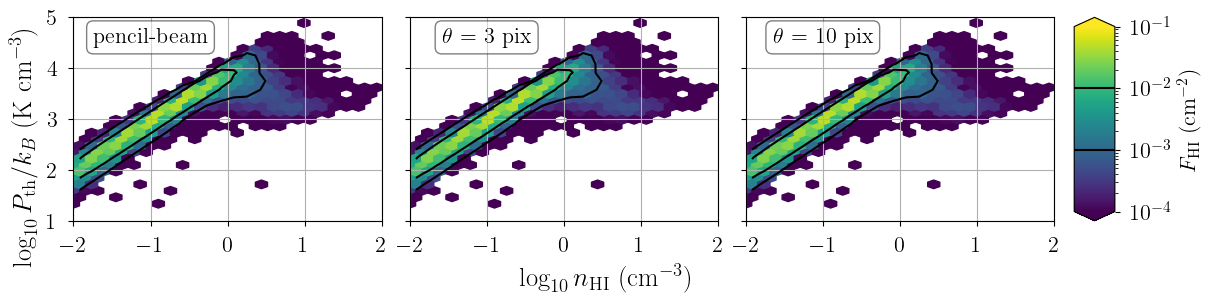

In [42]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative2D,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_nHI_tau", "log10_pressure_tau"],
    #labels=[r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{\tau}$", r"$\langle$\texttt{TIGRESS-NCR}$\rangle_{T_B}$"],
    xlabel=r"$\log_{10} n_{\rm HI}$ (cm$^{-3}$)",
    ylabel=r"$\log_{10} P_{\rm th}/k_B$ (K cm$^{-3}$)",
    xlim=(-2.0, 2.0),
    ylim=(1.0, 5.0),
    equal_line=False,
    volume=True,
    label_loc="upper left",
    cbar_label=r"$F_{\rm HI}$ (cm$^{-2}$)",
    vmin=1.0e-4,
    vmax=0.1,
    gridsize=25,
    contour_tigress=True,
    contour_levels=[1.0e-3, 1.0e-2],
)

## Kinetic Temperature

analysis_plots version 0.1


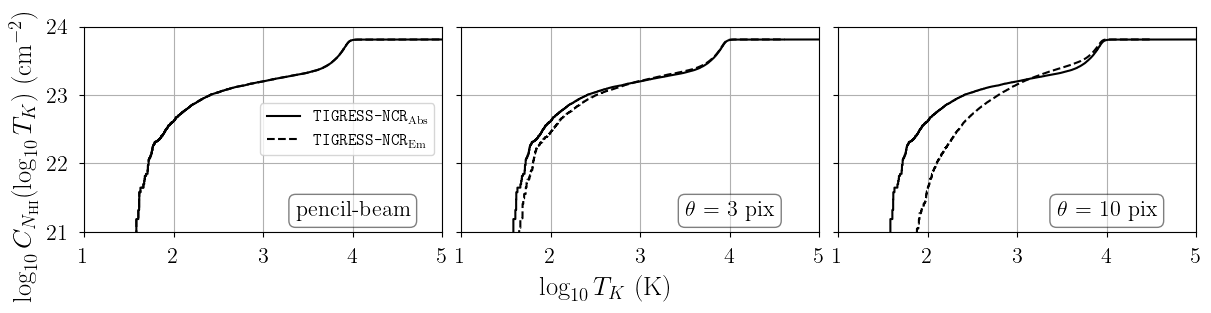

In [26]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_tkin_tau", "log10_tkin_TB"],
    labels=[r"\texttt{TIGRESS-NCR}$_{\rm Abs}$", r"\texttt{TIGRESS-NCR}$_{\rm Em}$"],
    xlabel=r"$\log_{10} T_K$ (K)",
    ylabel=r"$\log_{10} C_{N_{\rm HI}}(\log_{10} T_K)$ (cm$^{-2}$)",
    xlim=(1.0, 5.0),
    ylim=(21.0, 24.0),
    equal_line=False,
    volume=False,
    label_loc="lower right",
    legend_loc="right",
)

analysis_plots version 0.1


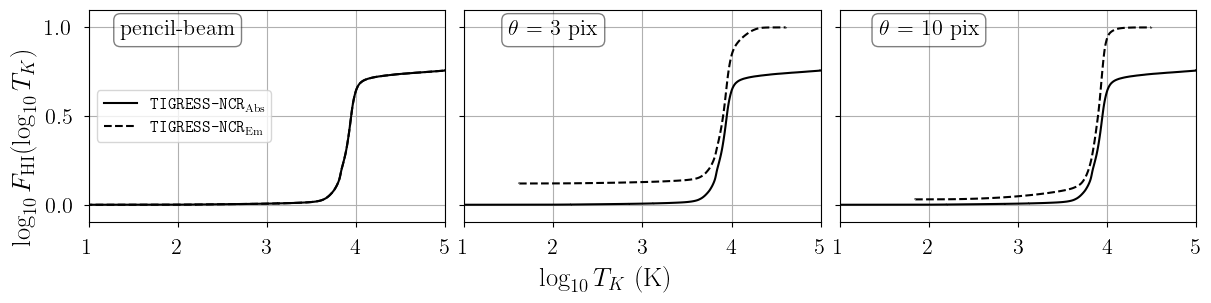

In [27]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_tkin_tau", "log10_tkin_TB"],
    labels=[r"\texttt{TIGRESS-NCR}$_{\rm Abs}$", r"\texttt{TIGRESS-NCR}$_{\rm Em}$"],
    xlabel=r"$\log_{10} T_K$ (K)",
    ylabel=r"$\log_{10} F_{\rm HI}(\log_{10} T_K)$",
    xlim=(1.0, 5.0),
    ylim=(-0.1, 1.1),
    equal_line=False,
    volume=True,
    label_loc="upper left",
    legend_loc="center left",
)

analysis_plots version 0.1


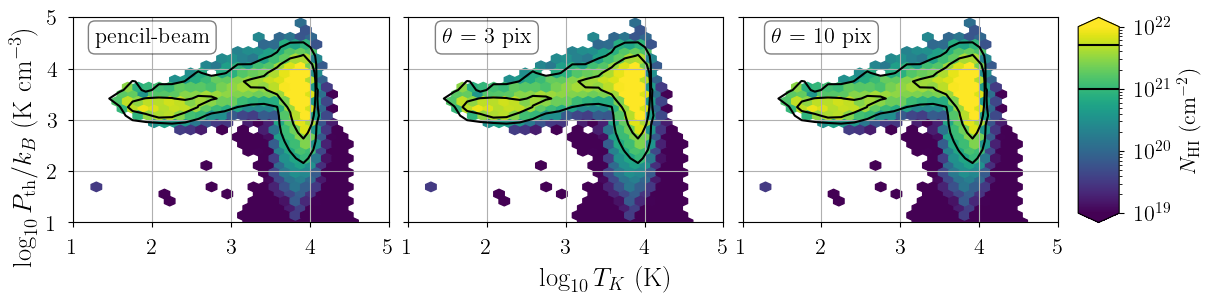

In [44]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative2D,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_tkin_tau", "log10_pressure_tau"],
    xlabel=r"$\log_{10} T_K$ (K)",
    ylabel=r"$\log_{10} P_{\rm th}/k_B$ (K cm$^{-3}$)",
    xlim=(1.0, 5.0),
    ylim=(1.0, 5.0),
    equal_line=False,
    volume=False,
    label_loc="upper left",
    cbar_label=r"$N_{\rm HI}$ (cm$^{-2}$)",
    vmin=1.0e19,
    vmax=1.0e22,
    gridsize=25,
    contour_tigress=True,
    contour_levels=[1e21, 5e21],
)

analysis_plots version 0.1


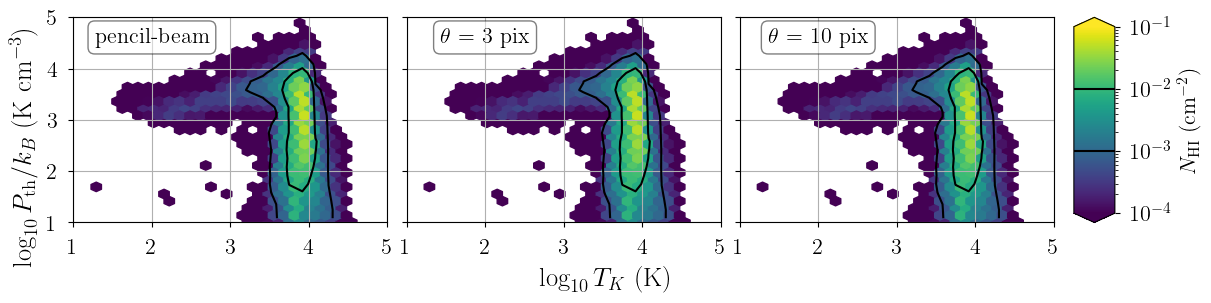

In [46]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative2D,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["log10_tkin_tau", "log10_pressure_tau"],
    xlabel=r"$\log_{10} T_K$ (K)",
    ylabel=r"$\log_{10} P_{\rm th}/k_B$ (K cm$^{-3}$)",
    xlim=(1.0, 5.0),
    ylim=(1.0, 5.0),
    equal_line=False,
    volume=True,
    label_loc="upper left",
    cbar_label=r"$N_{\rm HI}$ (cm$^{-2}$)",
    vmin=1.0e-4,
    vmax=0.1,
    gridsize=25,
    contour_tigress=True,
    contour_levels=[1.0e-3, 1.0e-2],
)

## Spin Temperature

analysis_plots version 0.1


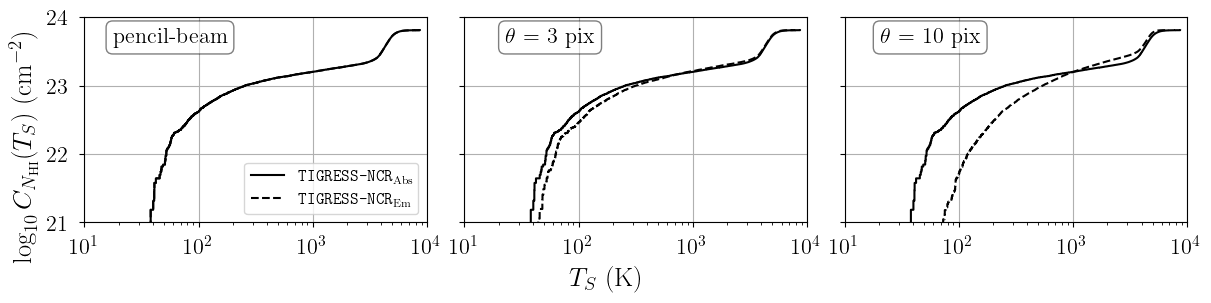

In [47]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["tspin_tau", "tspin_TB"],
    labels=[r"\texttt{TIGRESS-NCR}$_{\rm Abs}$", r"\texttt{TIGRESS-NCR}$_{\rm Em}$"],
    xlabel=r"$T_S$ (K)",
    ylabel=r"$\log_{10} C_{N_{\rm HI}}(T_S)$ (cm$^{-2}$)",
    xlim=(10.0, 10000.0),
    ylim=(21.0, 24.0),
    xscale="log",
    equal_line=False,
    volume=False,
    label_loc="upper left",
    legend_loc="lower right",
)

analysis_plots version 0.1


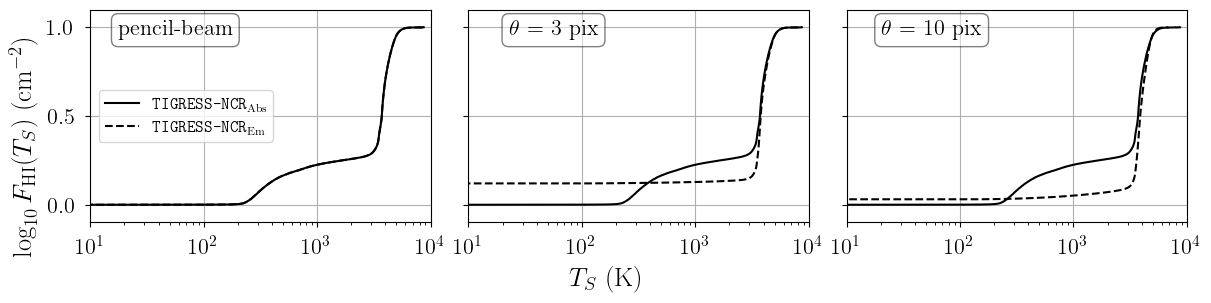

In [48]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results],
    ["tigress", "tigress"],
    params = ["tspin_tau", "tspin_TB"],
    labels=[r"\texttt{TIGRESS-NCR}$_{\rm Abs}$", r"\texttt{TIGRESS-NCR}$_{\rm Em}$"],
    xlabel=r"$T_S$ (K)",
    ylabel=r"$\log_{10} F_{\rm HI}(T_S)$ (cm$^{-2}$)",
    xlim=(10.0, 10000.0),
    ylim=(-0.1, 1.1),
    xscale="log",
    equal_line=False,
    volume=True,
    label_loc="upper left",
    legend_loc="center left",
)